In [1]:
from universal_datagen.generator.generator_text import AM2018TxtGenerator
from universal_models.models.segmentation import seg_net, seg_net_shallow

import tensorflow as tf
import keras
from keras.callbacks import *

from utils import *
import glob

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
model, output_height, output_width = seg_net(224, 224, 3, 4)

(None, 50176, 4)


In [3]:
training_data = AM2018TxtGenerator(['/l/projects/data/AM2018_SIMULATION/2700_noise_120/', ],
                                   (224,224,3), (output_height, output_width, 4), 
                                   crop_scale=0.2)
len(training_data)

10

In [4]:
tgen, vgen = training_data.generator(structure='stacked', num_crops=1, labeled=True, batch_size=1, split=0.2)
data = next(tgen)

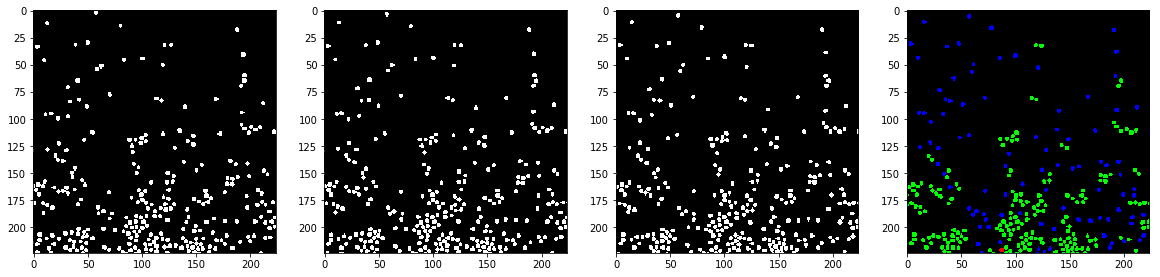

In [5]:
show_stacked(data);

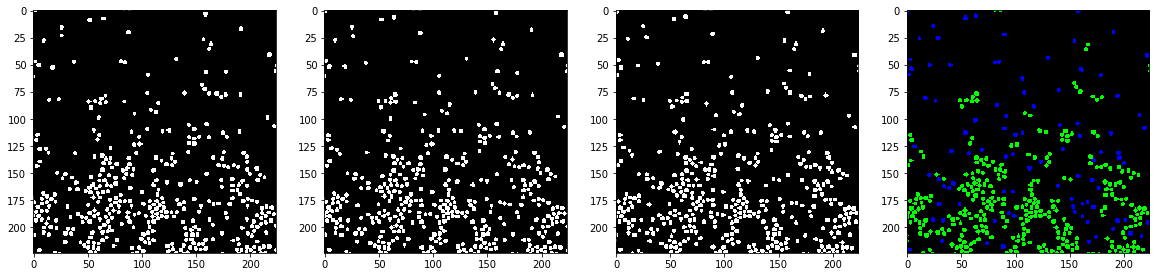

In [6]:
show_stacked(next(vgen));

(1, 3, 224, 224) (1, 4, 224, 224)
(1, 50176, 4)


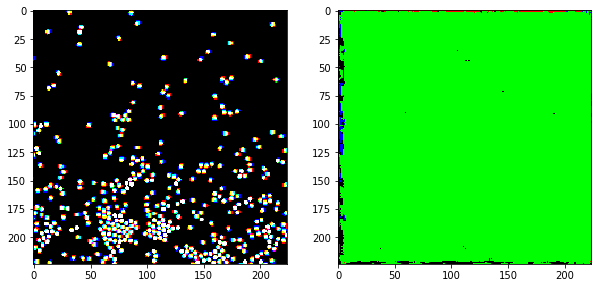

In [7]:
x, y = next(tgen)
print(x.shape, y.shape)
y_p = model.predict(x)
print(y_p.shape)
y_p = np.reshape(np.moveaxis(y_p, -1, 1), (1, 4, output_height, output_width))
show_pair((x, to_classes(y_p)), labeled=True);

0.24997865 0.25
0.24997865 0.25000662
0.24999641 0.25006405
0.24997865 0.25000674


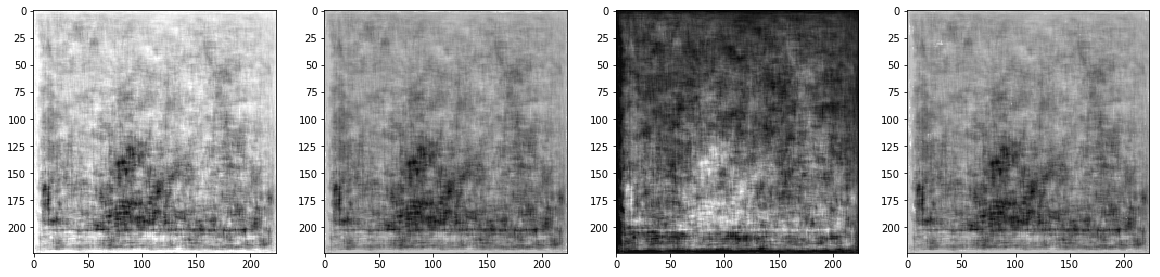

In [8]:
yp = y_p[0]
plt.figure(figsize=(20, 20))
for c in range(yp.shape[0]):
    plt.subplot(1, yp.shape[0], c + 1)
    print(np.min(yp[c]), np.max(yp[c]))
    plt.imshow(np.squeeze(yp[c]), cmap='gray')

0 1
0 1
0 1
0 1


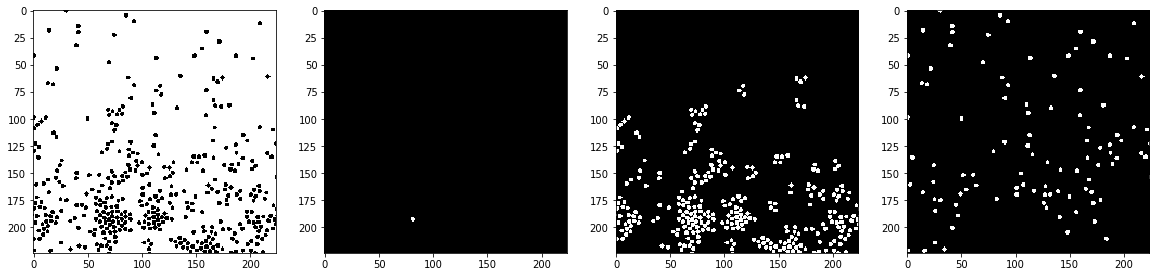

In [9]:
yp = y[0]
plt.figure(figsize=(20, 20))
for c in range(yp.shape[0]):
    plt.subplot(1, yp.shape[0], c + 1)
    print(np.min(yp[c]), np.max(yp[c]))
    plt.imshow(np.squeeze(yp[c]), cmap='gray')

In [10]:
tgen = training_data.generator(structure='stacked', num_crops=1, labeled=True, batch_size=8, flatten_label=True)

In [11]:
x, y = next(tgen)
print(x.shape, y.shape)

(5, 3, 224, 224) (5, 50176, 4)


In [12]:
weights = {}
for c in range(4):
    weights[c] = np.count_nonzero(y[:, :, c])

for k in weights:
    weights[k] = np.prod(y.shape[:-1]) / weights[k]

print(weights)

{0: 1.1220487407811583, 1: 398.22222222222223, 2: 12.027998849362355, 3: 43.247715911049816}


In [13]:
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit_generator(x=x, y=y, batch_size=4, epochs=300, callbacks=None, shuffle=True)

Epoch 1/300
2/2 [==============================] - 9s 4s/step - loss: 1.4290 - acc: 0.3826
Epoch 2/300
2/2 [==============================] - 2s 995ms/step - loss: 0.7562 - acc: 0.7753
Epoch 3/300
2/2 [==============================] - 2s 994ms/step - loss: 0.6006 - acc: 0.8556
Epoch 4/300
2/2 [==============================] - 2s 998ms/step - loss: 0.5578 - acc: 0.8646
Epoch 5/300
2/2 [==============================] - 2s 1s/step - loss: 0.5316 - acc: 0.8668
Epoch 6/300
2/2 [==============================] - 3s 1s/step - loss: 0.5115 - acc: 0.8697
Epoch 7/300
2/2 [==============================] - 3s 1s/step - loss: 0.4942 - acc: 0.8699
Epoch 8/300
2/2 [==============================] - 3s 1s/step - loss: 0.4839 - acc: 0.8698
Epoch 9/300
2/2 [==============================] - 3s 1s/step - loss: 0.4746 - acc: 0.8700
Epoch 10/300
2/2 [==============================] - 2s 969ms/step - loss: 0.4651 - acc: 0.8698
Epoch 11/300
2/2 [==============================] - 2s 970ms/step - loss: 0.4

2/2 [==============================] - 2s 954ms/step - loss: 0.0955 - acc: 0.9700
Epoch 172/300
2/2 [==============================] - 2s 964ms/step - loss: 0.0952 - acc: 0.9701
Epoch 173/300
2/2 [==============================] - 2s 961ms/step - loss: 0.0948 - acc: 0.9701
Epoch 174/300
2/2 [==============================] - 2s 958ms/step - loss: 0.0945 - acc: 0.9703
Epoch 175/300
2/2 [==============================] - 2s 957ms/step - loss: 0.0941 - acc: 0.9704
Epoch 176/300
2/2 [==============================] - 2s 960ms/step - loss: 0.0938 - acc: 0.9705
Epoch 177/300
2/2 [==============================] - 2s 955ms/step - loss: 0.0934 - acc: 0.9706
Epoch 178/300
2/2 [==============================] - 2s 953ms/step - loss: 0.0931 - acc: 0.9708
Epoch 179/300
2/2 [==============================] - 2s 964ms/step - loss: 0.0927 - acc: 0.9708
Epoch 180/300
2/2 [==============================] - 2s 955ms/step - loss: 0.0924 - acc: 0.9710
Epoch 181/300
2/2 [==============================] - 2

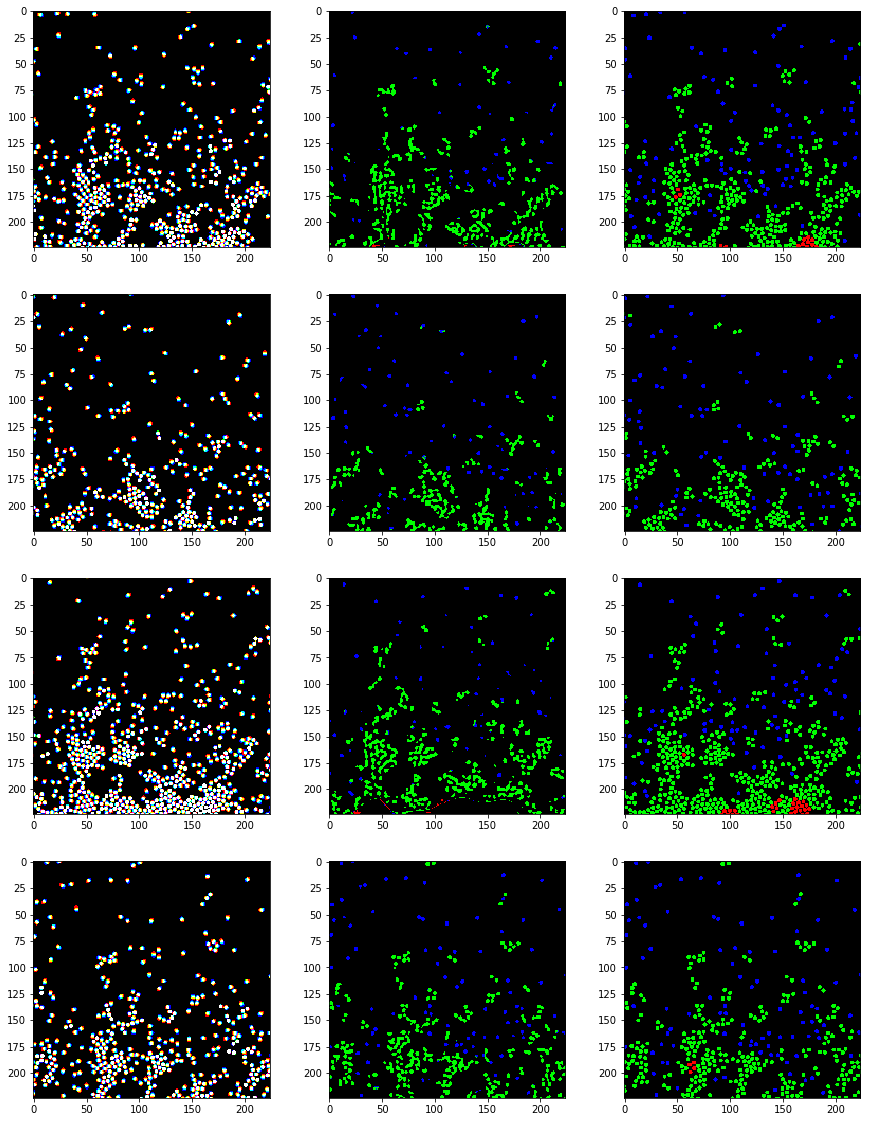

In [15]:
y_p = model.predict(x[:4])
y_p = np.reshape(np.moveaxis(y_p, -1, 1), (4, 4, output_height, output_width))
y = np.reshape(np.moveaxis(y[:4], -1, 1), (4, 4, output_height, output_width))
compare_pair((x[:4], to_classes(y_p), y), labeled=True);

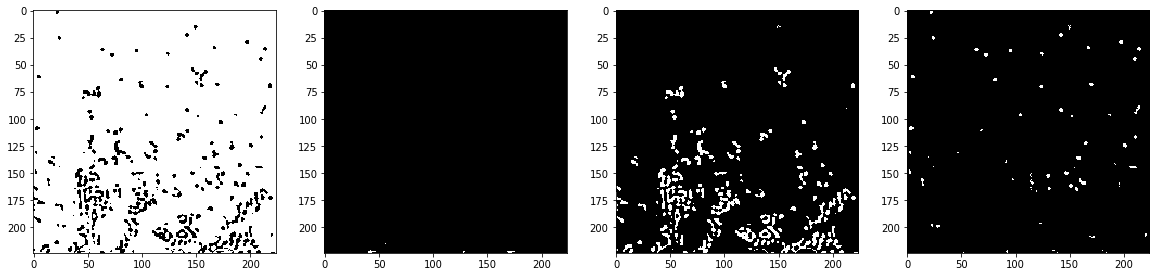

In [16]:
yp = to_classes(y_p)[0]
plt.figure(figsize=(20, 20))
for c in range(yp.shape[0]):
    plt.subplot(1, yp.shape[0], c + 1)
    plt.imshow(np.squeeze(yp[c]), cmap='gray')

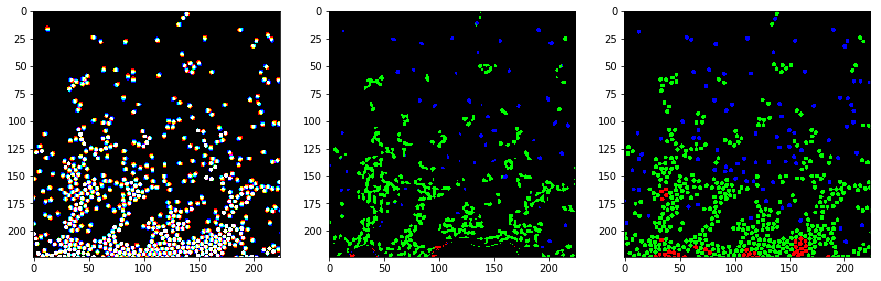

In [17]:
x, y = next(vgen)
y_p = model.predict(x)
y_p = np.reshape(np.moveaxis(y_p, -1, 1), (1, 4, output_height, output_width))
compare_pair((x, to_classes(y_p), y), labeled=True);